# Representation Learning
- Notes on reading this article :: https://arxiv.org/pdf/1206.5538.pdf
- http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

## TODO
- [ ] Read: https://icml.cc/2011/papers/455_icmlpaper.pdf
- [ ] Read: L.J.P. van der Maaten. Learning a Parametric Embedding by Preserving Local Structure. 
- [ ] Check TruncatedSVD: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

### 2020-12-19 Review
- What is representation learning?
    - Machine learning techniques have different ways to represent knowledge and features. Representation learning is way to maximize results by tweaking the representation
    
- What makes a good representation?
    - Authors discuss a list of topics. Smoothness is an assumption that often damages representations because it assumes properties in the data that are not always true. Good representations are related to dept and abstraction, specially with the ability to join abstraction to build more complex representations.
    - Still on abstractions, complex ones can represent more things with less arrangements
    - Solutions are often data-driven
    
- How machine learning techniques have been used to build representations?
    - Statistical models have been used
        - PCA
        - Sparse Coding
        - Markov Random Fields
        - Boltzmann machines (this was a big breakthrough at the time)
            - Restricted Boltzmann Machines (RBMs)
    - Deep models have been used
        - Autoenconders
        
### 2020-12-26 Review
- What is representation learning?
  - Real world data is usually messy, complicate and comes in high dimensions. Representation learning tries to transform the data into a new format that eases the learning for machine learning algorithms. This new format can be sparse, can represent multiple things, can be used to build more complex representations.
  
- What is overcompleteness?
    - Given a input and a weight matrix, a complete system is when you can map the inputs and the matrix to reconstruct the output. An overcomplete system is when you remove itens from the matrix, but you can still perfectly reconstruct the output.
    
- What is sparse coding?
    - Sparse Coding relies on the overcompleteness concept, it tries to remove all the non important vectors to still be able to reconstruct the output with the necessary information. The idea is that you receive the input and tries to learn the correct simplified weight matrix.
    
- What techniques can be used?
    - Autoenconders
    - PCA
    - Restricted Boltzmann Machines
    - Sparse Coding
    
- What is an auto-encoder?
    - It's model who recieves an input, transforms it to a latent space, and then transform the data back to its original form
    - encoder -> data in new format -> decoder
    - The key thing is the new representation formed, its usually simpler but complex, allowing the emergence of other patterns or knowledge.
    
- What is an regularized auto-encoder?
    - When performing the encoding and decoding minimizing the reconstruction error, the algorithm may learn the identity function instead of learning a new representation like: 10 * 1 = 10, 1 is the indentity. Regularized auto-encoders avoid this.
    
- What is a sparse auto-encoder?
    - It's also a way to solve the learning problem of the network. It works by adding a penalty to some parts of the network. (maybe a type of attention, where some parts of the network are completely disconsidered)
    
- What is a denoising auto-encoder?
    - The idea here is to recieve a damaged/noised input and the model will learn on how to denoise the data. The output will be a correct input instead of a damaged one.
    
- What is a contractive auto-encoder?
    - Adds a penalty to the decoder part of the auto-encoder. The penalty is usually the Euclidean norm of the Jacobian matrix of the encoder. The idea is to constract the space to get more robust features.

## 8 Representation Learning as Manifold Learning
- Manifolds represent geometrical figures. They are usually hard to define and some machine learning techniques try to learn a manifold format that solves classifications or prediction problems.
    - One interesting thing about manifolds is that if one is inside the manifold everything looks like a place (kind of like the earth).
- The manifold hypothesis:
    - States that high-dimensional data from the real world can be translated to a low-dimensional manifold.
    - This not a exact representation but rather an aproximation.
    - Highly related to topology, the classification task will learn how to separate the new representations by changing the topology of the space.
    
- Manifold learning as feature extraction techniques:
    - PCA can be the simplest form of manifold learning, where the algorithms tries to find the closest linear manifold.
    - Modeling manifolds usually built in a non-parametric approach by using graph algorithms (near neighbor graph)
    - Authors think the approach above doesn't generalize well to new data, because of the non-parametric approaches. They think that building a parametric map is the solution
    
### 8.1 Learning parametric maps based on neighborhood graphs
- There's no clear explanation on how this works. The paper points to a few other papers: https://ronan.collobert.com/pub/matos/2012_deeplearning_springer.pdf
    - Semi-supervised embedding

## PCA

In [3]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
print(pca.transform(X))



[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


## Restricted Boltmann Machines

In [4]:
import numpy as np
from sklearn.neural_network import BernoulliRBM

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
model = BernoulliRBM(n_components=2)
model.fit(X)
model.transform(X)

array([[0.7090401 , 0.72067579],
       [0.82237351, 0.83561751],
       [0.93495697, 0.94325285],
       [0.20178861, 0.19439654],
       [0.11743599, 0.10911136],
       [0.0410961 , 0.03610315]])

## Sparse Coding
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_sparse_coding.html#sphx-glr-auto-examples-decomposition-plot-sparse-coding-py
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html
- https://github.com/metaflow-ai/blog/tree/master/sparse-coding
- http://ufldl.stanford.edu/tutorial/unsupervised/SparseCoding/

### Notes
- Only receives the data as input
- Tries to find the representation without loosing information
- The intuition is that you will have your data and the algorithm will try to find a sparse representation as _h_. All the representations will for a dictionary (_W_ | _D_) which is a base to reconstruct the input. This reconstruction should be a linear combination of the basis vectors.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import SparseCoder
from sklearn.utils.fixes import np_version, parse_version


def ricker_function(resolution, center, width):
    """Discrete sub-sampled Ricker (Mexican hat) wavelet"""
    x = np.linspace(0, resolution - 1, resolution)
    x = ((2 / (np.sqrt(3 * width) * np.pi ** .25))
         * (1 - (x - center) ** 2 / width ** 2)
         * np.exp(-(x - center) ** 2 / (2 * width ** 2)))
    return x


def ricker_matrix(width, resolution, n_components):
    """Dictionary of Ricker (Mexican hat) wavelets"""
    centers = np.linspace(0, resolution - 1, n_components)
    D = np.empty((n_components, resolution))
    for i, center in enumerate(centers):
        D[i] = ricker_function(resolution, center, width)
    D /= np.sqrt(np.sum(D ** 2, axis=1))[:, np.newaxis]
    return D

In [3]:
resolution = 1024
subsampling = 3  # subsampling factor
width = 100
n_components = resolution // subsampling

# Compute a wavelet dictionary
D_fixed = ricker_matrix(width=width, resolution=resolution,
                        n_components=n_components)

D_multi = np.r_[tuple(ricker_matrix(width=w, resolution=resolution,
                      n_components=n_components // 5)
                for w in (10, 50, 100, 500, 1000))]

In [9]:
print(D_fixed.shape)
print(D_multi.shape)

# Generate a signal
y = np.linspace(0, resolution - 1, resolution)
first_quarter = y < resolution / 4
y[first_quarter] = 3.
y[np.logical_not(first_quarter)] = -1.

(341, 1024)
(340, 1024)


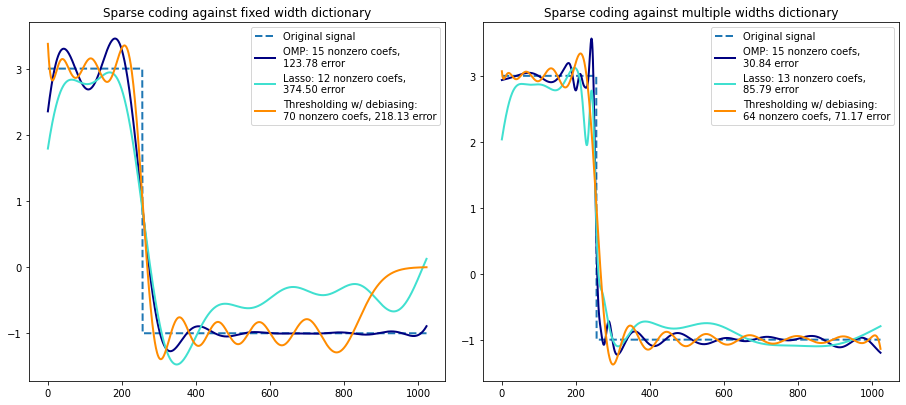

In [12]:
# List the different sparse coding methods in the following format:
# (title, transform_algorithm, transform_alpha,
#  transform_n_nozero_coefs, color)
estimators = [('OMP', 'omp', None, 15, 'navy'),
              ('Lasso', 'lasso_lars', 2, None, 'turquoise'), ]
lw = 2
# Avoid FutureWarning about default value change when numpy >= 1.14
lstsq_rcond = None if np_version >= parse_version('1.14') else -1

plt.figure(figsize=(13, 6))
for subplot, (D, title) in enumerate(zip((D_fixed, D_multi),
                                         ('fixed width', 'multiple widths'))):
    plt.subplot(1, 2, subplot + 1)
    plt.title('Sparse coding against %s dictionary' % title)
    plt.plot(y, lw=lw, linestyle='--', label='Original signal')
    # Do a wavelet approximation
    for title, algo, alpha, n_nonzero, color in estimators:
        coder = SparseCoder(dictionary=D, transform_n_nonzero_coefs=n_nonzero,
                            transform_alpha=alpha, transform_algorithm=algo)
        x = coder.transform(y.reshape(1, -1))
        density = len(np.flatnonzero(x))
        x = np.ravel(np.dot(x, D))
        squared_error = np.sum((y - x) ** 2)
        plt.plot(x, color=color, lw=lw,
                 label='%s: %s nonzero coefs,\n%.2f error'
                 % (title, density, squared_error))

    # Soft thresholding debiasing
    coder = SparseCoder(dictionary=D, transform_algorithm='threshold',
                        transform_alpha=20)
    x = coder.transform(y.reshape(1, -1))
    _, idx = np.where(x != 0)
    x[0, idx], _, _, _ = np.linalg.lstsq(D[idx, :].T, y, rcond=lstsq_rcond)
    x = np.ravel(np.dot(x, D))
    squared_error = np.sum((y - x) ** 2)
    plt.plot(x, color='darkorange', lw=lw,
             label='Thresholding w/ debiasing:\n%d nonzero coefs, %.2f error'
             % (len(idx), squared_error))
    plt.axis('tight')
    plt.legend(shadow=False, loc='best')
plt.subplots_adjust(.04, .07, .97, .90, .09, .2)
plt.show()

In [16]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])
sparsity_constraint = tf.placeholder(tf.float32)



## Auto-encoders
- https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/

In [5]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as keras
import numpy as np

class ConvAutoencoder:
    @staticmethod
    def build(width, height, depth, filters=(32, 64), latentDim=16):
        # initialize the input shape to be "channels last" along with
        # the channels dimension itself
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1
        
        # define the input to the encoder
        inputs = Input(shape=inputShape)
        x = inputs
        for f in filters:
            # apply a CONV => RELU => BN operation
            x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
            x = LeakyReLU(alpha=0.2)(x)
            x = BatchNormalization(axis=chanDim)(x)

        # flatten the network and then construct our latent vector
        volumeSize = keras.int_shape(x)
        x = Flatten()(x)
        latent = Dense(latentDim)(x)
        # build the encoder model
        encoder = Model(inputs, latent, name="encoder")

        # start building the decoder model which will accept the
        # output of the encoder as its inputs
        latentInputs = Input(shape=(latentDim,))
        x = Dense(np.prod(volumeSize[1:]))(latentInputs)
        x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
        
        # loop over our number of filters again, but this time in
        # reverse order
        for f in filters[::-1]:
            # apply a CONV_TRANSPOSE => RELU => BN operation
            x = Conv2DTranspose(f, (3, 3), strides=2, padding="same")(x)
            x = LeakyReLU(alpha=0.2)(x)
            x = BatchNormalization(axis=chanDim)(x)
            
        # apply a single CONV_TRANSPOSE layer used to recover the
        # original depth of the image
        x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
        outputs = Activation("sigmoid")(x)

        decoder = Model(latentInputs, outputs, name="decoder")
        autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")
        return (encoder, decoder, autoencoder)

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# initialize the number of epochs to train for and batch size
EPOCHS = 25
BS = 32

print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = tf.keras.datasets.mnist.load_data()

# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# construct our convolutional autoencoder
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28, 28, 1)
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)
H = autoencoder.fit(
    trainX, trainX,
    validation_data=(testX, testX),
    epochs=EPOCHS,
    batch_size=BS
)

[INFO] loading MNIST dataset...
[INFO] building autoencoder...
Epoch 1/25
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0198 - val_loss: 0.0123
Epoch 2/25
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 3/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0093 - val_loss: 0.0103
Epoch 4/25
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 5/25
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 6/25
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 7/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 8/25
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 9/25
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0075 - val_loss: 0.0075
E

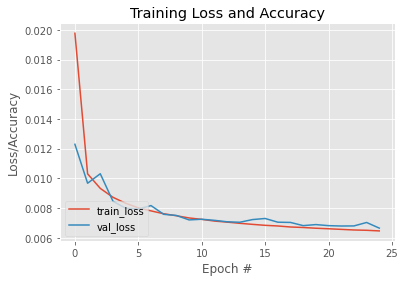

In [14]:
import matplotlib.pyplot as plt
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [16]:
import cv2

# use the convolutional autoencoder to make predictions on the
# testing images, then initialize our list of output images
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
outputs = None
args = {
    "samples": 8,
}

# loop over our number of output samples
for i in range(0, args["samples"]):
    # grab the original image and reconstructed image
    original = (testX[i] * 255).astype("uint8")
    recon = (decoded[i] * 255).astype("uint8")
    # stack the original and reconstructed image side-by-side
    output = np.hstack([original, recon])
    # if the outputs array is empty, initialize it as the current
    # side-by-side image display
    if outputs is None:
        outputs = output
    # otherwise, vertically stack the outputs
    else:
        outputs = np.vstack([outputs, output])
# save the outputs image to disk
cv2.imwrite("output.png", outputs)

[INFO] making predictions...


True

# t-SNE
- "It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high."
- t-SNE has a non-convex objective function, this means that the initialization of the optimizer is random so it will give different results on different runs.

- https://lvdmaaten.github.io/tsne/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [4]:
import numpy as np
from sklearn.manifold import TSNE

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X_embedded = TSNE(n_components=2).fit_transform(X)

print("t-SNE")
print(X_embedded)

import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print("PCA")
print(pca.transform(X))

import numpy as np
from sklearn.neural_network import BernoulliRBM

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
model = BernoulliRBM(n_components=2)
model.fit(X)
print("Restricted Boltmann Machines")
print(model.transform(X))

t-SNE
[[-198.16736    44.050194]
 [ 109.97156   -88.376366]
 [ -22.584526   27.89564 ]
 [ -92.20565  -134.10188 ]
 [ 128.95918   118.03394 ]
 [ -61.47985   199.87709 ]]
PCA
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
Restricted Boltmann Machines
[[0.70913298 0.71496506]
 [0.82009236 0.82818702]
 [0.9343528  0.93921774]
 [0.20004798 0.19620064]
 [0.11797049 0.11270314]
 [0.04107644 0.03811308]]
